<a href="https://colab.research.google.com/github/vikasgtm/Analytics_Vidhya/blob/main/AV_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AV Project 4
# EDA and Effect of outliers on Regression-Visualization
# Submitted by: Vikas Gautam,
# mail-id: vikasgtm@gmail.com

# Category: Equity, Stocks

In [1]:
import statsmodels
import statsmodels.api as sm
import numpy as np
#from statsmodels.tsa.stattools import adfuller, kpss

In [11]:
#!pip install pmdarima

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats

import seaborn as sns
import math
from pmdarima.arima import auto_arima

from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import abline_plot
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from scipy import stats
import pylab
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
plt.rcParams["figure.figsize"] = (10, 8)  # Figure size and width

## Equity/Stocks: Apple

In [6]:
# Fetch historical data for Apple
ticker_symbol = "AAPL"
start_date = "2019-01-01"
end_date = "2024-04-30"
aapl_stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
aapl_stock_data['Return']=aapl_stock_data['Adj Close'].pct_change()

aapl_stock_data.describe()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Return
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1.340000e+03,1339.000000
mean,126.315830,127.734616,125.002485,126.437108,124.744794,9.907625e+07,0.001337
std,47.051287,47.448423,46.649075,47.060298,47.315361,5.212180e+07,0.019966
min,35.994999,36.430000,35.500000,35.547501,34.029236,2.404830e+07,-0.128647
25%,79.402500,79.982498,78.890001,79.553749,77.447155,6.540620e+07,-0.008209
50%,138.794998,141.635002,136.994995,138.924995,137.312538,8.667305e+07,0.001140
75%,165.852501,167.832504,164.444996,165.884998,164.351372,1.161214e+08,0.012116
max,198.020004,199.619995,197.000000,198.110001,197.589523,4.265100e+08,0.119808


In [7]:
aapl_stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.673920,49537800,0.006392
2024-04-24,166.539993,169.300003,166.210007,169.020004,168.791061,48251800,0.012702
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.659882,50558300,0.005147
2024-04-26,169.880005,171.339996,169.179993,169.300003,169.070679,44838400,-0.003473
2024-04-29,173.369995,176.029999,173.100006,173.500000,173.264984,68169400,0.024808


# 2. META

In [8]:
# Fetch historical data for Microsoft
ticker_symbol2 = "META"
start_date = "2019-01-01"
end_date = "2024-04-30"
meta_stock_data = yf.download(ticker_symbol2, start=start_date, end=end_date)
# Calculate returns
meta_stock_data['Return'] = meta_stock_data['Adj Close'].pct_change()

#Display data
print(meta_stock_data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02  128.990005  137.509995  128.559998  135.679993  135.401764   
2019-01-03  134.690002  137.169998  131.119995  131.740005  131.469833   
2019-01-04  134.009995  138.000000  133.750000  137.949997  137.667099   
2019-01-07  137.559998  138.869995  135.910004  138.050003  137.766907   
2019-01-08  139.889999  143.139999  139.539993  142.529999  142.237717   
...                ...         ...         ...         ...         ...   
2024-04-23  491.250000  498.760010  488.970001  496.100006  495.607941   
2024-04-24  508.059998  510.000000  484.579987  493.500000  493.010498   
2024-04-25  421.399994  445.769989  414.500000  441.380005  440.942200   
2024-04-26  441.459991  446.440002  431.959991  443.290009  442.850311   
2024-04-29  439.559998  439.760010  428.559998  432.619995  432.190887   

              Volume    Return  
Date

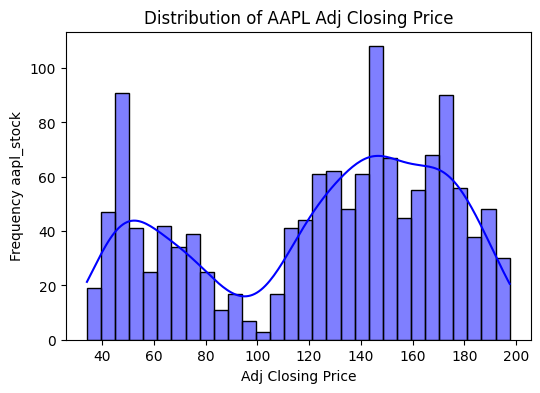

In [31]:
# Plotting the distribution of Apple Adj Closing Prices
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=aapl_stock_data['Adj Close'], kde=True, bins=30, color='blue',ax=ax)
plt.title('Distribution of AAPL Adj Closing Price')
plt.xlabel('Adj Closing Price')
plt.ylabel('Frequency aapl_stock')
plt.show()

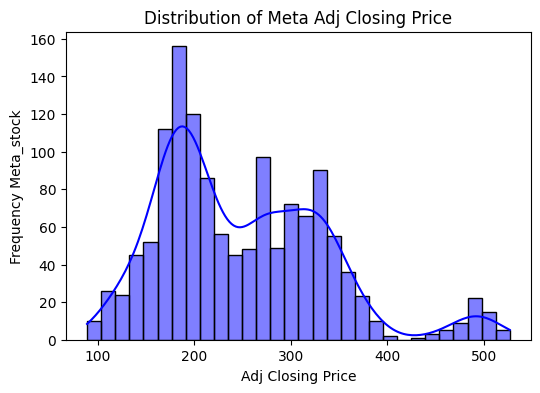

In [30]:
# Plotting the distribution of Meta Adj Closing Prices
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(data=meta_stock_data['Adj Close'], kde=True, bins=30, color='blue',ax=ax)
plt.title('Distribution of Meta Adj Closing Price')
plt.xlabel('Adj Closing Price')
plt.ylabel('Frequency Meta_stock')
plt.show()

**Calculate Statistics for Apple dataset**

In [15]:
# Calculate statistics
aaplmean_close1 = round(np.mean(aapl_stock_data['Adj Close']), 4)
aaplmean_return1 = round(np.mean(aapl_stock_data['Return']), 4)

aaplstd1 = round(np.std(aapl_stock_data['Adj Close']),4)
aaplstd_dev1 = round(np.std(aapl_stock_data['Return']),4)
aaplvariance1 = round(np.var(aapl_stock_data['Return']),4)
aaplskewness1 = skew(aapl_stock_data['Adj Close'])
aaplkurtosis1 = kurtosis(aapl_stock_data['Adj Close'])

# Output results
print ("\nApple Summary Statitics:")
print ("AAPL Mean Adj Close: ", aaplmean_close1)
print ("Standard deviation of Closing Prices ", aaplstd1)
print("Skewness of Closing Prices:", round(aaplskewness1,4))
print("Kurtosis of Closing PRices:", round(aaplkurtosis1, 4))

print ("\n For Returns:")
print ("Mean Daily Return ", aaplmean_return1)

print("Std Dev. Return ", aaplstd_dev1)

print("Variance of Return:", aaplvariance1)



Apple Summary Statitics:
AAPL Mean Adj Close:  124.7448
Standard deviation of Closing Prices  47.2977
Skewness of Closing Prices: -0.4582
Kurtosis of Closing PRices: -1.101

 For Returns:
Mean Daily Return  0.0013
Std Dev. Return  0.02
Variance of Return: 0.0004


In [ ]:
# This indicates that the average adjusted closing price of AAPL stock over the #specified period is approximately $124.
# This represents the average daily return of AAPL stock over the specified period is approximately 0.13%.
# The standard deviation measures the dispersion or variability of closing prices around the mean.
# A higher standard deviation indicates greater price volatility.
# Skewness measures the asymmetry of the distribution of closing prices. A negative skewness
# indicates a left-skewed distribution, where the tail on the left side is longer or fatter than the tail on the right side.
# AAPL's closing prices exhibit a slight left skew.
# Kurtosis measures the tailedness or peakedness of the distribution of closing prices relative to a normal distribution.
# Negative kurtosis indicates a distribution with thinner tails and a flatter peak compared to a normal distribution.
# AAPL's closing prices exhibit negative kurtosis, indicating a flatter peak and thinner tails compared
# to a normal distribution.


## Merge Apple and Meta datasets

In [16]:
df1=pd.merge(aapl_stock_data,meta_stock_data, on='Date', how='inner')
df1.dropna(inplace=True)
df1.head()

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Return_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Return_y
Date,,,,,,,,,,,,,,
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029236,365248800,-0.099607,134.690002,137.169998,131.119995,131.740005,131.469833,22717900,-0.029039
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481922,234428400,0.042689,134.009995,138.000000,133.750000,137.949997,137.667099,29002100,0.047138
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402958,219111200,-0.002225,137.559998,138.869995,135.910004,138.050003,137.766907,20089300,0.000725
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077835,164101200,0.019063,139.889999,143.139999,139.539993,142.529999,142.237717,26263800,0.032452
2019-01-09,37.822498,38.632500,37.407501,38.327499,36.690502,180396400,0.016982,142.949997,144.699997,141.270004,144.229996,143.934219,22205900,0.011927


# Box Plot of Returns of Apple and Meta

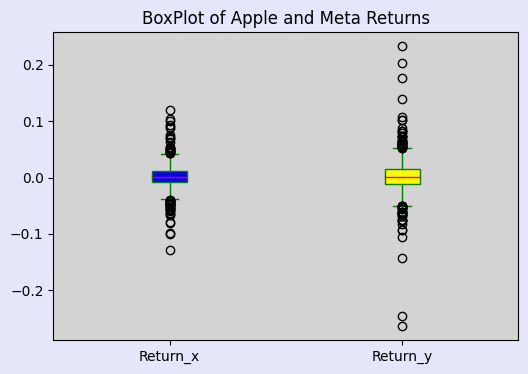

In [29]:
props = dict(boxes="Green", whiskers="Green", medians="Red", caps="Green")
color=['blue','yellow']
fig,ax = plt.subplots(figsize=(6,4), facecolor = 'lavender')
ax,props=df1.boxplot( column =['Return_x','Return_y'], grid = False, color=props, patch_artist=True,return_type='both', ax=ax)
ax.set_facecolor('LightGrey')
#ax,props = df.plot.box(patch_artist=True, return_type='both', ax=ax)
for patch,color in zip(props['boxes'],color):
    patch.set_facecolor(color)

plt.title("BoxPlot of Apple and Meta Returns")
plt.show();

# Apple and Meta Stock Price Daily Adj Close Time Series Daily Chart

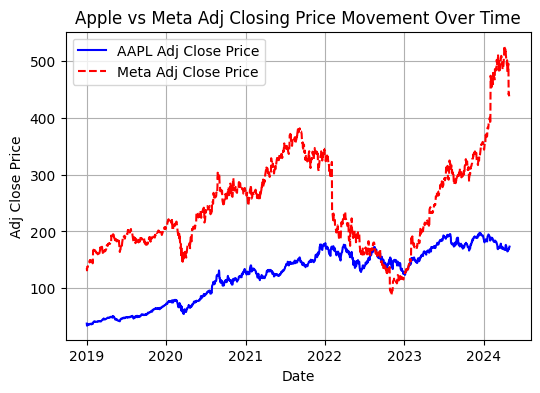

In [28]:
# Plotting the time series of Closing  Prices
plt.figure(figsize=(6, 4))
plt.plot(aapl_stock_data.index, aapl_stock_data['Adj Close'], label='AAPL Adj Close Price', color='blue')
plt.plot(meta_stock_data.index, meta_stock_data['Adj Close'], label='Meta Adj Close Price', color='red', linestyle='--')

plt.title('Apple vs Meta Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot of Adj Close

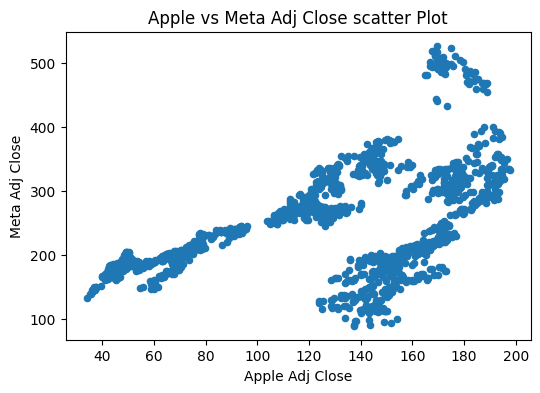

In [26]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
scatt = df1.plot.scatter(x="Adj Close_x", y="Adj Close_y", ax=ax)
scatt.set(xlabel="Apple Adj Close", ylabel="Meta Adj Close", title="Apple vs Meta Adj Close scatter Plot")

plt.show()

# Scatter Plot of Daily Returns

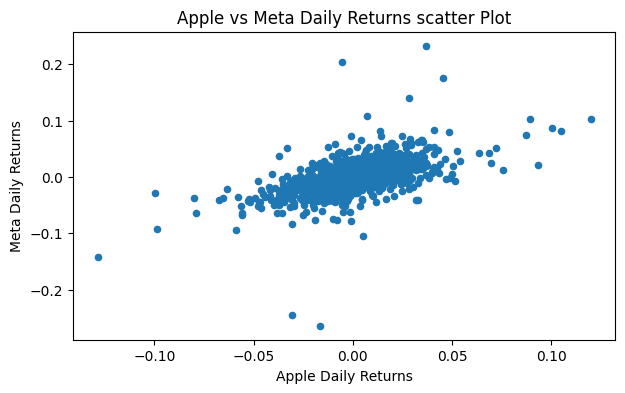

In [25]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(7, 4))
scatt = df1.plot.scatter(x="Return_x", y="Return_y", ax=ax)
scatt.set(xlabel="Apple Daily Returns", ylabel="Meta Daily Returns", title="Apple vs Meta Daily Returns scatter Plot")

plt.show()

## Sensitivity to outliers : Visualization - Part 1

## First, we will create model on Untreated Dataset
# Model1: OLS model

In [24]:
# OLS model
model_1 = smf.ols("Return_x ~ Return_y", data=df1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Return_x   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     626.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.21e-113
Time:                        21:26:02   Log-Likelihood:                 3598.2
No. Observations:                1339   AIC:                            -7192.
Df Residuals:                    1337   BIC:                            -7182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      1.832      0.067   -5.85e-05       0.002
Return_y       0.4071      0.016     25.021      0.000       0.375       0.439
==============================================================================
Omnibus:                      140.425   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.911
Skew:                           0.145   Prob(JB):                    1.12e-220
Kurtosis:                       7.251   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Parameters with high precision
print(model_1.summary2().tables[1])

              Coef.  Std.Err.          t          P>|t|    [0.025    0.975]
Intercept  0.000826  0.000451   1.832110   6.715744e-02 -0.000058  0.001711
Return_y   0.407073  0.016270  25.020503  1.213705e-113  0.375157  0.438990


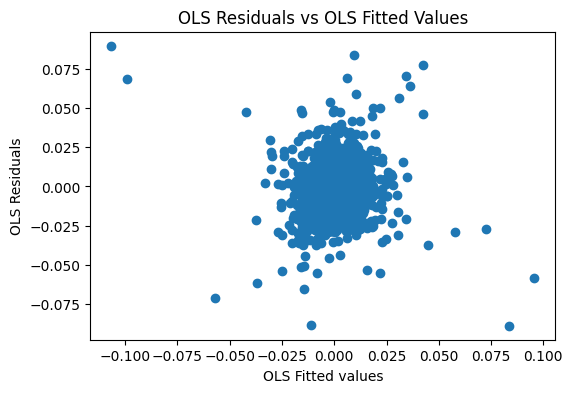

In [35]:
# Scatter Plot for OLS Fitted Values and OLS Residuals
plt.figure(figsize=(6, 4))
# Fitted values and residuals
model_fitted_y = model_1.fittedvalues
model_resid_y = model_1.resid

# Plot
plt.scatter(x=model_fitted_y, y=model_resid_y)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()

In [ ]:
# Figure shows that there is some variation in residuals and because R-square is low, we have to improve the model

## Breusch-Pagan Test Result : heteroskedasticity

In [36]:
# Breusch-Pagan Test
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_1.resid, model_1.model.exog)
pd.DataFrame(test, index=name, columns=[""])

,
Lagrange multiplier statistic,2.351033
p-value,0.125200
f-value,2.351650
f p-value,0.125387


# because the p-value is greater than 0.05, there is no heteroskedasticity issue

## Model2:  WLS Result

In [37]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
df1["abs_residuals1"] = np.abs(model_1.resid)
df1["fitted_values1"] = model_1.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp = smf.ols("abs_residuals1 ~ fitted_values1", data=df1).fit()

# Compute weights and add it to the data_set column
weights = model_temp.fittedvalues
weights = weights**-2
df1["weights1"] = weights

# Fit WLS model
Y = df1["Return_x"].tolist()
X = df1["Return_y"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS = sm.WLS(Y, X, df1["weights1"]).fit()
model_WLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            WLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     601.0
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          6.52e-110
Time:                        21:32:09   Log-Likelihood:                 3585.4
No. Observations:                1339   AIC:                            -7167.
Df Residuals:                    1337   BIC:                            -7156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      1.878      0.061   -3.84e-05       0.002
x1             0.3906      0.016     24.515      0.000       0.359       0.422
==============================================================================
Omnibus:                      163.133   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1602.148
Skew:                           0.031   Prob(JB):                         0.00
Kurtosis:                       8.358   Cond. No.                         35.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

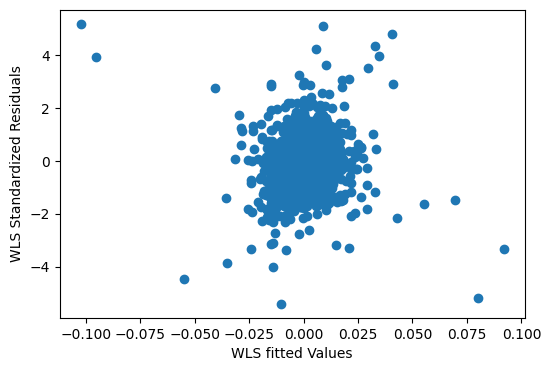

In [39]:
# WLS fitted values and standardized residuals
plt.figure(figsize=(6, 4))
fitted_valuesWLS = model_WLS.fittedvalues
model_residWLS = model_WLS.resid
std_model_residWLS = model_residWLS / model_residWLS.std(ddof=1)

# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS, std_model_residWLS)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()


# Robust Regression
## Model 3 :  Huber Method

In [40]:
# Robust Regression model
rr_huber = sm.RLM(
    df1["Return_x"], sm.add_constant(df1["Return_y"]), M=sm.robust.norms.HuberT()
)
rr_huber_results = rr_huber.fit()
rr_huber_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Return_x   No. Observations:                 1339
Model:                            RLM   Df Residuals:                     1337
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Jul 2024                                         
Time:                        21:33:04                                         
No. Iterations:                    29                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.864      0.062   -3.69e-05       0.001
Return_y       0.4342      0.014     31.436      0.000       0.407       0.461
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Model 4:  Bisquare Method

In [41]:
# Bisquare Method model
rr_bisquare = sm.RLM(
    df1["Return_x"],
    sm.add_constant(df1["Return_y"]),
    M=sm.robust.norms.TukeyBiweight(),
)
rr_bisquare_results = rr_bisquare.fit()
rr_bisquare_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Return_x   No. Observations:                 1339
Model:                            RLM   Df Residuals:                     1337
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Jul 2024                                         
Time:                        21:33:22                                         
No. Iterations:                    29                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.548      0.122      -0.000       0.001
Return_y       0.4437      0.014     32.437      0.000       0.417       0.470
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

# Scatter Plot of Apple Daily Return and Meta Daily Return with Different Regression Lines

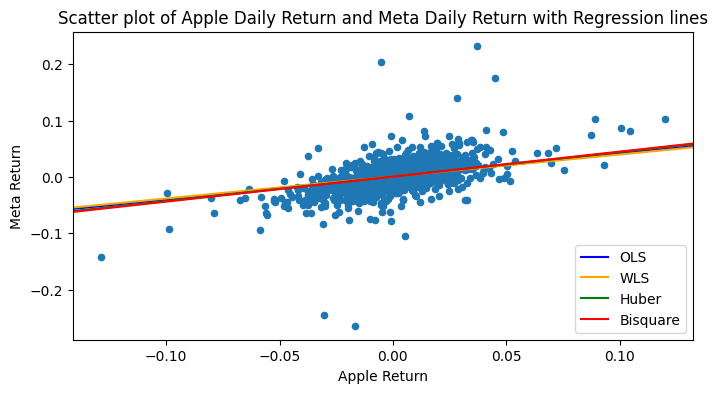

In [44]:
# Scatter Plot of U.S. Dollar Index Daily Return and 10-Year Treasury Bond Yield Daily Return with Different Regression Lines

# scatter-plot data
fig, ax = plt.subplots(figsize=(8, 4))
scatt = df1.plot(x="Return_x", y="Return_y", kind="scatter",ax=ax)
scatt.set(xlabel="Apple Return", ylabel="Meta Return")

# plot regression lines
abline_plot(model_results=model_1, ax=scatt, color="blue", label="OLS")
abline_plot(model_results=model_WLS, ax=scatt, color="orange", label="WLS")
abline_plot(model_results=rr_huber_results, ax=scatt, color="green", label="Huber")
abline_plot(model_results=rr_bisquare_results, ax=scatt, color="red", label="Bisquare")
plt.title("Scatter plot of Apple Daily Return and Meta Daily Return with Regression lines")
plt.legend(loc="lower right")
plt.show()

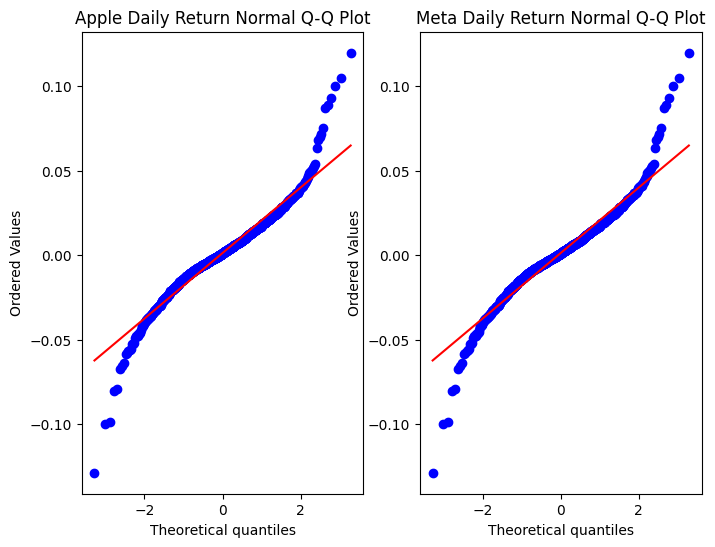

In [45]:
# QQ Plot for Normal Distribution

# Normal QQ plots
plt.figure(figsize=(8, 6))
ax1 = plt.subplot(121)
stats.probplot(df1['Return_x'], dist="norm", plot=pylab)
plt.title("Apple Daily Return Normal Q-Q Plot")

ax2 = plt.subplot(122)
stats.probplot(df1['Return_x'], dist="norm", plot=pylab)
plt.title("Meta Daily Return Normal Q-Q Plot")
pylab.show()

In [46]:
# Shapiro Wilk Tests
print ("\n Shapiro Wilk Tests: ")
shapiro_test_aapl = stats.shapiro(df1['Return_x'])
print("Apple")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_test_aapl.statistic, shapiro_test_aapl.pvalue
    )
)

shapiro_test_meta = stats.shapiro(df1['Return_x'])
print("\nMeta")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_test_meta.statistic, shapiro_test_meta.pvalue
    )
)


 Shapiro Wilk Tests: 
Apple
Shapiro W: 0.9412319295665574 
Shapiro pvalue 1.2644167638607447e-22

Meta
Shapiro W: 0.9412319295665574 
Shapiro pvalue 1.2644167638607447e-22


# Sensitivity to Outliers- Part 2
## Removing some Data points to make it less dense at the centre
## and try to make it one ended to see the better effect of outliers on
## the regression clearly

## We will use Modified Data

In [47]:
#Taking values with higher than z-score
#Apple Return
z2 = np.abs(stats.zscore(df1['Return_x']))
# Meta Return
z1 = np.abs(stats.zscore(df1['Return_y']))

threshold1=-1.5
threshold2=-0.5
df2=df1[z1>threshold1]
df2=df2[z2>threshold2]

In [55]:
# Removing some data points of low Apple Returns betwwen 0.02% and -0,02% and keeping 10% of the selected

np.random.seed(11111)  # Random seed
nrow = (df2["Return_x"]<0.02) & (df2["Return_x"]>-0.02)
#nrow = (df2["Return_x"]>-0.01)
len1=nrow.shape[0]
len1
len2=df2.shape[0]
len2
train_sequence = sorted(np.random.choice(len1, int(len1 * 0.9), replace=False))
train_sequence2 = sorted(set(list(range(0, len2))) - set(train_sequence))



In [56]:
df3=df2.iloc[train_sequence2,:]
#df3
id_vars=["Return_x","Return_y"]

df3=df3.loc[:,id_vars]
df3.head()

,Return_x,Return_y
Date,,
2019-01-25,0.033137,0.021806
2019-01-31,0.007201,0.108164
2019-02-13,-0.004155,-0.005877
2019-02-26,0.000574,-0.002976
2019-03-25,-0.012091,0.011866


# Modified Dataset

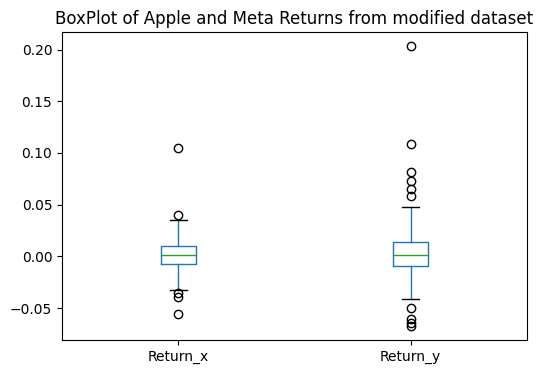

In [57]:
plt.figure(figsize=(6, 4))
df3.boxplot( column =['Return_x','Return_y'], grid = False)
plt.title("BoxPlot of Apple and Meta Returns from modified dataset");

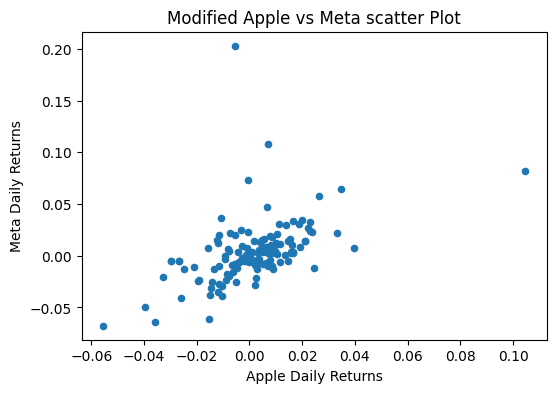

In [54]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
scatt = df3.plot.scatter(x="Return_x", y="Return_y",ax=ax)
scatt.set(xlabel="Apple Daily Returns", ylabel="Meta Daily Returns", title="Modified Apple vs Meta scatter Plot")

plt.show()

## Model1: OLS Regression Result - Modified Dataset

In [58]:
# OLS model
model_2 = smf.ols("Return_x ~ Return_y", data=df3).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Return_x   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     44.19
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           7.16e-10
Time:                        21:47:43   Log-Likelihood:                 371.21
No. Observations:                 134   AIC:                            -738.4
Df Residuals:                     132   BIC:                            -732.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.001      0.205      0.838      -0.002       0.003
Return_y       0.2908      0.044      6.648      0.000       0.204       0.377
==============================================================================
Omnibus:                       31.426   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.902
Skew:                           0.341   Prob(JB):                     2.02e-60
Kurtosis:                       9.984   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Parameters with high precision
print(model_2.summary2().tables[1])

              Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept  0.000272  0.001327  0.205068  8.378350e-01 -0.002354  0.002898
Return_y   0.290825  0.043749  6.647545  7.163061e-10  0.204285  0.377366


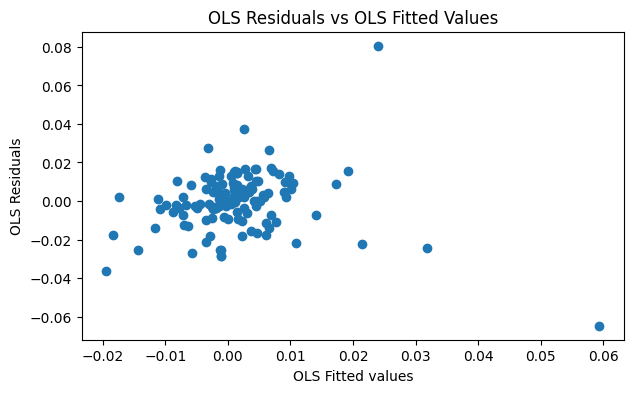

In [61]:
# Scatter Plot for OLS Fitted Values and OLS Residuals

# Fitted values and residuals
model_fitted_y2 = model_2.fittedvalues
model_resid_y2 = model_2.resid
fig, ax = plt.subplots(figsize=(7, 4))
# Plot
plt.scatter(x=model_fitted_y2, y=model_resid_y2)
plt.title("OLS Residuals vs OLS Fitted Values")
plt.xlabel("OLS Fitted values")
plt.ylabel("OLS Residuals")
plt.show()


# Model2: WLS Result -Modified Dataset

In [62]:
# WLS regression result

# Add Absolute residuals and fitted values to dataset columns
df3["abs_residuals2"] = np.abs(model_2.resid)
df3["fitted_values2"] = model_2.fittedvalues

# Fit OLS model with absolute residuals and fitted values
model_temp2 = smf.ols("abs_residuals2 ~ fitted_values2", data=df3).fit()

# Compute weights and add it to the data_set column
weights2 = model_temp2.fittedvalues
weights2 = weights2**-2
df3["weights2"] = weights2

# Fit WLS model
Y = df3["Return_x"].tolist()
X = df3["Return_y"].tolist()
X = sm.add_constant(X)  # add a intercept point

model_WLS2 = sm.WLS(Y, X, df3["weights2"]).fit()
model_WLS2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.424
Model:                            WLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     97.30
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.56e-17
Time:                        21:48:35   Log-Likelihood:                 228.35
No. Observations:                 134   AIC:                            -452.7
Df Residuals:                     132   BIC:                            -446.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.004      1.604      0.111      -0.002       0.015
x1             0.6438      0.065      9.864      0.000       0.515       0.773
==============================================================================
Omnibus:                      181.402   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22086.353
Skew:                           4.660   Prob(JB):                         0.00
Kurtosis:                      65.201   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

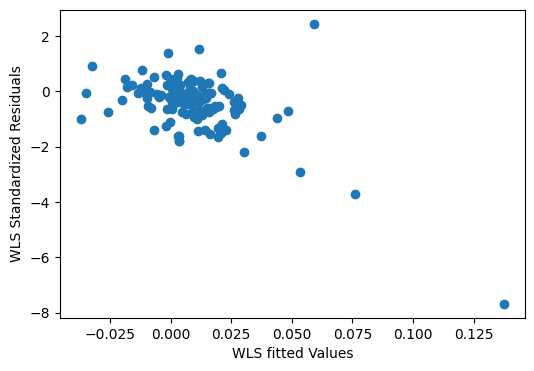

In [64]:
# WLS fitted values and standardized residuals
fitted_valuesWLS2 = model_WLS2.fittedvalues
model_residWLS2 = model_WLS2.resid
std_model_residWLS2 = model_residWLS2 / model_residWLS2.std(ddof=1)
plt.figure(figsize=(6, 4))
# Plot WLS fitted v. vs standardized res. scatterplot
plt.scatter(fitted_valuesWLS2, std_model_residWLS2)
plt.xlabel("WLS fitted Values")
plt.ylabel("WLS Standardized Residuals")
plt.show()

# Robust Regression -
## Model3: Huber Method

In [65]:
# Robust Regression model
rr_huber2 = sm.RLM(
    df3["Return_x"], sm.add_constant(df3["Return_y"]), M=sm.robust.norms.HuberT()
)
rr_huber_results2 = rr_huber2.fit()
rr_huber_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Return_x   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Jul 2024                                         
Time:                        21:49:19                                         
No. Iterations:                    25                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.969      0.332      -0.001       0.003
Return_y       0.3774      0.034     11.181      0.000       0.311       0.444
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Model4: Bisquare Method

In [66]:
# Bisquare Method model
rr_bisquare2 = sm.RLM(
    df3["Return_x"],
    sm.add_constant(df3["Return_y"]),
    M=sm.robust.norms.TukeyBiweight(),
)
rr_bisquare_results2 = rr_bisquare2.fit()
rr_bisquare_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               Return_x   No. Observations:                  134
Model:                            RLM   Df Residuals:                      132
Method:                          IRLS   Df Model:                            1
Norm:                   TukeyBiweight                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Jul 2024                                         
Time:                        21:49:39                                         
No. Iterations:                    32                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.966      0.334      -0.001       0.003
Return_y       0.4535      0.033     13.812      0.000       0.389       0.518
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Scatter Plot of Apple Daily Return and Meta Daily Return with Different Regression Lines

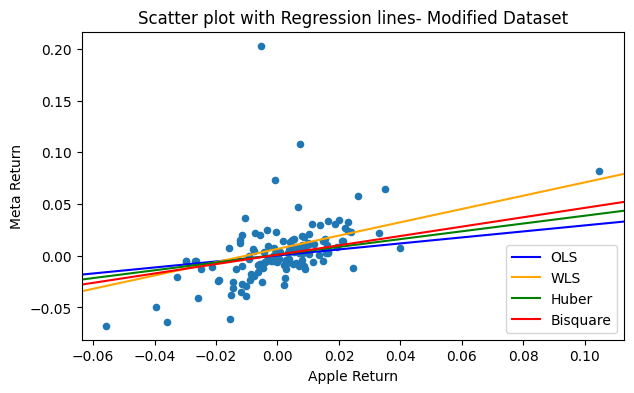

In [69]:
# Scatter Plot of Returns with Different Regression Lines
fig, ax = plt.subplots(figsize=(7, 4))
# scatter-plot data
scatt = df3.plot(x="Return_x", y="Return_y", kind="scatter",ax=ax)
scatt.set(xlabel="Apple Return", ylabel="Meta Return")

# plot regression lines
abline_plot(model_results=model_2, ax=scatt, color="blue", label="OLS")
abline_plot(model_results=model_WLS2, ax=scatt, color="orange", label="WLS")
abline_plot(model_results=rr_huber_results2, ax=scatt, color="green", label="Huber")
abline_plot(model_results=rr_bisquare_results2, ax=scatt, color="red", label="Bisquare")
plt.title("Scatter plot with Regression lines- Modified Dataset")
plt.legend(loc="lower right")
plt.show();

# Thnks.